# Exercise 5.3: Neural Networks in Keras - Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# See https://keras.io/
# for extennsive documentation
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense

Let us visit the problem of wine quality prediction previously encountered in Exercises 3.2 and 4.1 one final time. After linear regression and a self-made network, we can now explore the comfort provided by the Keras library.

In [2]:
# The code snippet below is responsible for downloading the dataset to
# Google. You can directly download the file using the link
# if you work with a local anaconda setup
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

/bin/sh: wget: command not found


In [3]:
# load all examples from the file
data = np.genfromtxt('winequality-white.csv',delimiter=";",skip_header=1)

print("data:", data.shape)

# Prepare for proper training
np.random.shuffle(data) # randomly sort examples

# take the first 3000 examples for training
X_train = data[:3000,:11] # all features except last column
y_train = data[:3000,11]  # quality column

# and the remaining examples for testing
X_test = data[3000:,:11] # all features except last column
y_test = data[3000:,11] # quality column

print("First example:")
print("Features:", X_train[0])
print("Quality:", y_train[0])


data: (4898, 12)
First example:
Features: [7.0000e+00 3.1000e-01 3.5000e-01 1.6000e+00 6.3000e-02 1.3000e+01
 1.1900e+02 9.9184e-01 3.2200e+00 5.0000e-01 1.0700e+01]
Quality: 5.0


Below is the simple network from exercise 4.1 implemented using Keras. In addition to the network we define the loss function and optimiser.

In [24]:
# See: https://keras.io/api/models/sequential/ and 
# https://keras.io/api/layers/core_layers/dense/
# We can use the Sequential class to very easiliy
# build a simple architecture
model = Sequential()
# 11 inputs, 20 outputs, relu
model.add(Dense(20, input_dim=11, activation='relu')) 
model.add(Dense(20, activation='relu')) 
model.add(Dense(20, activation='relu')) 
# 20 inputs (automatically detected by Keras), 1 output, linear activation
model.add(Dense(1, activation='linear'))


# Set loss function and optimiser algorithm
# Remove comments from of these versions:

# Initial:
#model.compile(loss='mse',  # mean squared error
#              optimizer='sgd'# stochastic gradient descent
#             ) 
#
# sgd with mometum
# instead of passing a string, we can explicitely construct the optimizer object
# this gives us more control over its properties
#opt = keras.optimizers.SGD(momentum=0.8) 
#model.compile(loss='mse',  # mean squared error
#              optimizer='sgd'
#             ) 
#
# Adam:
opt = keras.optimizers.Adam(learning_rate=0.0005) 
model.compile(loss='mse',  # mean squared error
              optimizer=opt
             ) 




# Training and evaluation below

The code below trains the network for 5 epochs using the loss function and optimiser defined above. Each example is individually passed to the network

In [25]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=70, batch_size=10) # changed batch size to 10 


Epoch 1/70
300/300 [==============================] - 1s 2ms/step - loss: 46.4118 - val_loss: 3.1073
Epoch 2/70
300/300 [==============================] - 0s 1ms/step - loss: 2.7097 - val_loss: 2.1891
Epoch 3/70
300/300 [==============================] - 0s 1ms/step - loss: 1.9155 - val_loss: 0.9903
Epoch 4/70
300/300 [==============================] - 0s 1ms/step - loss: 0.8393 - val_loss: 0.7024
Epoch 5/70
300/300 [==============================] - 0s 1ms/step - loss: 0.6665 - val_loss: 0.6581
Epoch 6/70
300/300 [==============================] - 0s 1ms/step - loss: 0.7041 - val_loss: 0.6317
Epoch 7/70
300/300 [==============================] - 0s 1ms/step - loss: 0.6754 - val_loss: 0.6689
Epoch 8/70
300/300 [==============================] - 0s 1ms/step - loss: 0.6605 - val_loss: 0.6133
Epoch 9/70
300/300 [==============================] - 0s 1ms/step - loss: 0.6512 - val_loss: 0.6183
Epoch 10/70
300/300 [==============================] - 0s 1ms/step - loss: 0.6678 - val_loss: 0.616

In [26]:
# The history object returned by the model training above 
# contains the values of the loss function (the mean-squared-error)
# at different epochs
# We discard the first epoch as the loss value is very high,
# obscuring the rest of the distribution
train_loss = history.history["loss"][1:]
test_loss = history.history["val_loss"][1:]

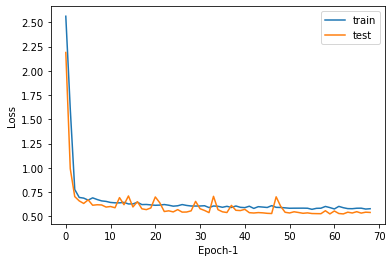

In [27]:
# Prepare and plot loss over time
plt.plot(train_loss,label="train")
plt.plot(test_loss,label="test")
plt.legend()
plt.xlabel("Epoch-1")
plt.ylabel("Loss")
plt.show()

Correlation coefficient: 0.5500396765061618


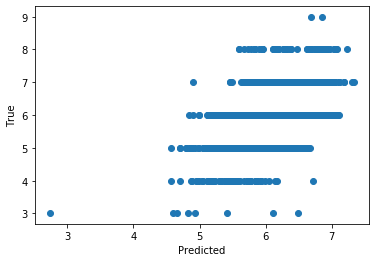

In [28]:
# After the training:

# Prepare scatter plot
y_pred = model.predict(X_test)[:,0]

print("Correlation coefficient:", np.corrcoef(y_pred,y_test)[0,1])
plt.scatter(y_pred,y_test)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()